## Simple Neural Network vs Convolution Neural Network

### Fundamental difference between a densely connected layer and a convolution layer is
 - Dense layers learn global patterns in their input feature space
 - Convolution layers learn local patterns (pattern found in small 2D windows (kernels), e.g. in case of MNIST example 3x3 windows/kernels)

### Two interesting properties of ConvNet:
 - The patterns they learn are translation invarient. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets data efficient when processing images (because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power.
 - They can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts.

Convolutions operate over 3D tensors, called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis).The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an 3D output feature map.
 - In the MNIST example, the first convolution layer takes a feature map of size (28, 28, 1) and outputs a feature map of size (26, 26, 32): it computes 32 filters over its input. Each of these 32 output channels contains a 26 × 26 grid of values, which is a response map of the filter over the input, indicating the response of that filter pattern at different locations in the input. That is what the term feature map means: every dimension in the depth axis is a feature (or filter), and the 2D tensor output[:, :, n] is the 2D spatial map of the response of this filter over the input.

#### Convolutions are defined by two key parameters:
 - Size of the patches extracted from the inputs — These are typically 3 × 3 or 5 × 5. 
 - Depth of the output feature map — The number of filters computed by the convolution. In the above (MNIST) example tarted with a depth of 32 and ended with a depth of 64.

### Keras Conv2D layers:

#### Conv2D (output_depth, (window_height, window_width)).
 - A convolution works by sliding these windows of size 3 × 3 or 5 × 5 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features. Each such 3D patch is then transformed (via a tensor product with the same learned weight matrix, called the convolution kernel) into a 1D vector of shape (output_depth,). All of these vectors are then spatially reassembled into a 3D output map of shape (height, width, output_depth). Every spatial location in the output feature map corresponds to the same location in the input feature map (for example, the lower-right corner of the output contains information about the lower-right corner of the input). For instance, with 3 × 3 windows, the vector output[i, j, :] comes from the 3D patch input[i-1:i+1, j-1:j+1, :].

### Understanding border effect and Paddding:
- Consider a 5 × 5 feature map (25 tiles total). There are only 9 tiles around which you can center a 3 × 3 window, forming a 3 × 3 grid (see figure 5.5). Hence, the output feature map will be 3 × 3. It shrinks by two tiles alongside each dimension. Because of this border effect in the earlier example (MNIST): we start with 28 × 28 inputs, which become 26 × 26 after the first convolution layer.
- To get an output feature map with the same spatial dimensions as the input, one can use padding.
- Padding consists of adding an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. For a 3 × 3 window, we have to add one column on the right, one column on the left, one row at the top, and one row at the bottom.

### Stride:
- The other factor that can influence output size is the strides. The distance between two successive windows is a parameter of the convolution, called its stride, which defaults to 1.
- Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
- To downsample feature maps, instead of strides, we tend to use the max-pooling operation.

### Max-Pooling:
- The role of max pooling is to aggressively downsample feature maps.
- Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel.
- Max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1).

### Why downsample feature maps this way? Why not remove the max-pooling layers and keep fairly large feature maps all the way up?
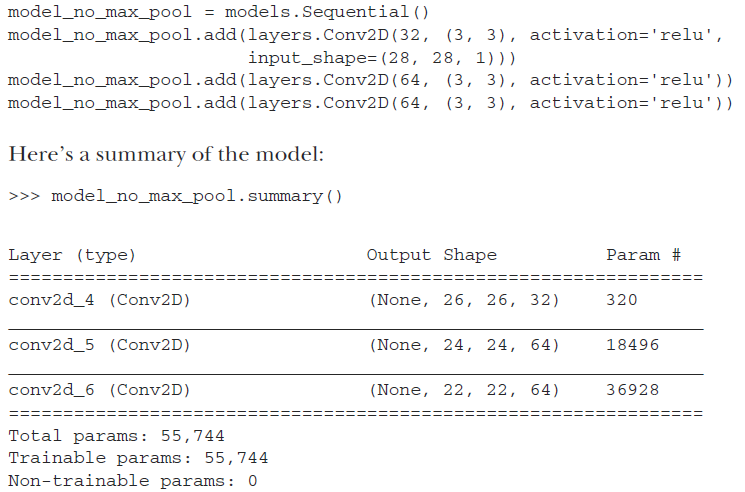

#### What’s wrong with this setup? Two things:
- It isn’t conducive to learning a spatial hierarchy of features. The 3 × 3 windows in the third layer will only contain information coming from 7 × 7 windows in the initial input. The high-level patterns learned by the convnet will still be very small with regard to the initial input, which may not be enough to learn to classify digits (try recognizing a digit by only looking at it through windows that are 7 × 7 pixels!). We need the features from the last convolution layer to contain information about the totality of the input.
- The final feature map has 22 × 22 × 64 = 30,976 total coefficients per sample. This is huge. If you were to flatten it to stick a Dense layer of size 512 on top, that layer would have 15.8 million parameters. This is far too large for such a small model and would result in intense overfitting.

The reason to use downsampling is to reduce the number of feature-map coefficients to process, as well as to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows (in terms of the fraction of the original input they cover).

Max pooling tends to work better than these alternative solutions (Stride-2 or Ave Pooling). The reason is that features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence, the term feature map), and it’s more informative to look at the maximal presence of different features than at
their average presence. 
- The most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the features over small patches, rather than looking at sparser windows of the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.